## A basic trajectory calculation

Import modules:

In [1]:
%pylab inline
import numpy as np #for the maths
import matplotlib as pl #for the plotting

Populating the interactive namespace from numpy and matplotlib


The velocity of the sphere will be affected by gravity:  $f=mg$ ($g\approx9.81$ m/s$^2$).

And aerodynamic drag: $C_D\approx\frac{24}{Re} 
+ \frac{2.6\frac{Re}{5}}{1+\frac{Re}{5}^{1.52}} 
+ \frac{0.411\frac{Re}{263000}^{-7.94}}{1+\frac{Re}{263000}^{-8}}
+ \frac{Re^{0.8}}{461000}$

where $C_D$ is the drag coefficient and $Re$ the Reynolds number ($Re=\frac{vd}{\nu}$, where $d$ is the diameter of the sphere and $\nu$ the kinematic viscosity of air ($\approx1.48\times$10$^{−5}$ m$^2$/s). We'll create a function to calculate the drag coefficient for a given Reynolds number:

In [2]:
def spherecd(Re):
    cd = (24/Re) + (2.6*(Re/5))/(1+(Re/5)**1.52) + (0.411*(Re/263000)**-7.94)/(1+(Re/263000)**-8) + (Re**0.8/461000);
    return cd

In [3]:
spherecd(10000)

0.393564428240075

Now we'll define our constants, arrays and starting conditions:

In [4]:
# constants
rho = 1.2 # density of air
nu = 1.48e-5 # kinematic viscosity of air
g = 9.81 # acceleration due to gravity
d = 0.04 # diameter of sphere
S = pi * (d / 2)**2 # frontal area of sphere
m = 0.015 # mass of sphere
deltaT = 0.001 # time step for our simulation

# initialize arrays
# we expect the sphere to be in the air no more than three seconds 
# so set our array to be of length 3/deltaT (this is quite crude, but works!)
l = round(3/deltaT)
# now initialize arrays for quntities of interest
h = zeros(l) # height of sphere
x = zeros(l) # horizontal ordinate of sphere
vX = zeros(l) # horizontal velocity
vY = zeros(l) # vertical velocity
Re = zeros(l) # Reynolds number
cd = zeros(l) # drag coefficient

# starting conditions
h[0] = 0.1 # height of sphere at start
x[0] = 0 # horizontal ordinate of sphere at start
v = 10 # initial velocity of sphere [m/s]
alpha = pi/6 # initial angle of trajectory
vX[0] = v * cos(alpha) # initial horizontal velocity
vY[0] = v * sin(alpha) # initial vertical velocity
Re[0] = sqrt(vX[0]**2 + vY[0]**2) * d / nu # initial Reynolds number
cd[0] = spherecd(Re[0]) # initial drag coefficient

Now we need to caculate the afffect of drag ($1/2 \rho v^2 S C_D$) and gravity on the sphere at successive time steps and stop when the sphere drops below a certain point (here $h=0$). We'll do this in a while loop:

In [5]:
i=0
while (h[i] > 0):
    vY[i+1] = vY[i] - (0.5 * rho * vY[i]**2 * S * cd[i] / m) * deltaT # vel. change due to vertical drag
    vX[i+1] = vX[i] - (0.5 * rho * vX[i]**2 * S * cd[i] / m) * deltaT # vel. change due to horizontal drag
    vY[i+1] = vY[i+1] - g * deltaT # vel. change due to gravity
    x[i+1] = x[i] + vX[i+1] * deltaT # new horizontal position
    h[i+1] = h[i] + vY[i+1] * deltaT # new vertical position
    Re[i+1] = sqrt(vX[i+1]**2 + vY[i+1]**2) * d / nu # Reynolds number
    cd[i+1] = spherecd(Re[i+1]) # drag coefficient
    i = i + 1

Now we can plot the results!

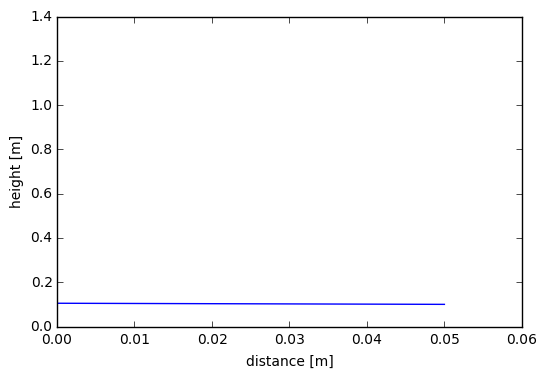

In [8]:
plot(x[0:i], h[0:i])
xlabel('distance [m]')
ylabel('height [m]')

## What about imparting the intitial velocity on the sphere?

Let's say we're using a spring of stiffness $k=500$ Nm which has beed compressed 5 cm:

In [9]:
deltaT = 0.00001 # We'll need a much smaller time step
l = round(0.1 / deltaT)
x = zeros(l) # spring length
x[0] = 0.05 # initial deflection [m]
k = 500 # spring constant [Nm]

We then go through basically the same procedure as above, but stop when the spring compression is zero (we also ignore gravity):

9.13371360763


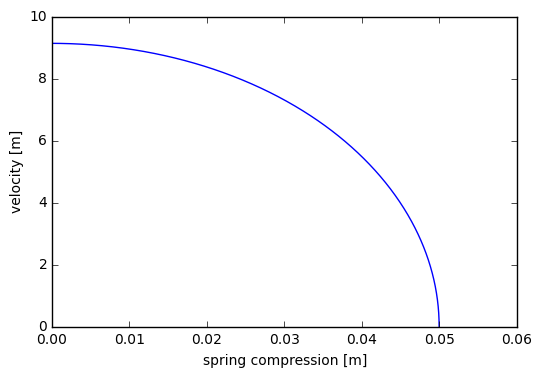

In [10]:
rho = 1.2 # density of air
nu = 1.48e-5 # kinematic viscosity of air
g = 9.81 # acceleration due to gravity
d = 0.04 # diameter of sphere
S = pi * (d / 2)**2 # frontal area of sphere
m = 0.015 # mass of sphere

v = zeros(l) # velocity
Re = zeros(l) # Reynolds number
cd = zeros(l) # drag coefficient
f = zeros(l) # spring force

v[0] = 0.001 # need to use a very small initial velocity to avoid divide by zeros
Re[0] = v[0] * d / nu # initial Reynolds number
cd[0] = spherecd(Re[0]) # initial drag coefficient

i = 0;
while (x[i] > 0):
    fs = x[i] * k # spring force
    fd = -0.5 * rho * v[i]**2 * S * cd[i] # drag force
    f[i] = fs + fd # total force
    a = (fs + fd) / m # acceleration
    v[i+1] = v[i] + a * deltaT # new velocity
    x[i+1] = x[i] - v[i] * deltaT # new position
    Re[i] = v[i+1] * S / nu # Reynolds number
    cd[i+1] = spherecd(Re[i]) # drag coefficient
    i = i + 1
print(v[i])
plot(x[0:i], v[0:i])
xlabel('spring compression [m]')
ylabel('velocity [m]')

We could plug this exit velocity back into the calculation above to find out the trajectory at this spring setting for different launch angles. Note that all these calculations assume the sphere is moving in isolation of other objects, which may cause changes in drag, e.g. the drag would be different if the sphere were travelling down a tubde while the spring is acting on it. You can of course use different formulas for the drag and/or calibrate your code with experiments.